# 라이브러리 불러오기

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] = 'NanumGothic'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 설정
plt.style.use('fivethirtyeight')
sns.set(font_scale = 1.0)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#모델
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

# 평가지표
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cross Validation
from sklearn.model_selection import TimeSeriesSplit , GridSearchCV, cross_val_score

# 구글 드라이브 연결

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# 데이터셋 불러오기

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/CodeStates/CP1/강남_아파트_실거래가예측_for_modeling_2017_2020.csv')
df.drop('Unnamed: 0', axis = 1,inplace=True)
df.head()

,구,동,단지명,거래금액(만원),혼인건수,인구밀도,소비자물가지수,가계대출_십억원,기준금리,1km내_유치원수,...,공원_최소거리,1km내_학교수,학교_최소거리,1km내_학원수,학원_최소거리,계약일자,floor_group,top10,construction_year_group,area_range_group
0,강남구,삼성동,서광아파트,108000,2519,13859,97.844,567339.6,1.5,5,...,0.999269,6,0.383584,251,0.072215,2018-01-02,1,0,2,0
1,강남구,삼성동,서광아파트,120000,2519,13859,97.844,567339.6,1.5,5,...,0.999269,6,0.383584,251,0.072215,2018-01-24,3,0,2,0
2,강남구,삼성동,서광아파트,149000,2519,13859,97.844,567339.6,1.5,5,...,0.999269,6,0.383584,251,0.072215,2018-01-26,3,0,2,2
3,강남구,삼성동,서광아파트,121000,2519,13859,98.552,568189.6,1.5,5,...,0.999269,6,0.383584,251,0.072215,2018-02-13,1,0,2,0
4,강남구,삼성동,서광아파트,149000,2519,13859,98.392,582403.6,1.5,5,...,0.999269,6,0.383584,251,0.072215,2018-07-30,3,0,2,2


In [5]:
df.dtypes

구                           object
동                           object
단지명                         object
거래금액(만원)                     int64
혼인건수                         int64
인구밀도                         int64
소비자물가지수                    float64
가계대출_십억원                   float64
기준금리                       float64
1km내_유치원수                    int64
유치원_최소거리                   float64
1km내_지하철역수                   int64
지하철역_최소거리                  float64
1km내_문화시설수                   int64
문화시설_최소거리                  float64
1km내_공원수                     int64
공원_최소거리                    float64
1km내_학교수                     int64
학교_최소거리                    float64
1km내_학원수                     int64
학원_최소거리                    float64
계약일자                        object
floor_group                  int64
top10                        int64
construction_year_group      int64
area_range_group             int64
dtype: object

In [6]:
df.describe()

,거래금액(만원),혼인건수,인구밀도,소비자물가지수,가계대출_십억원,기준금리,1km내_유치원수,유치원_최소거리,1km내_지하철역수,지하철역_최소거리,...,1km내_공원수,공원_최소거리,1km내_학교수,학교_최소거리,1km내_학원수,학원_최소거리,floor_group,top10,construction_year_group,area_range_group
count,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,...,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000
mean,155796.542259,2440.000381,13988.002452,98.682280,598901.902496,1.242657,3.718544,0.351613,1.942564,0.408780,...,0.654406,0.358254,9.217045,0.292909,467.185821,0.111011,1.171108,0.199608,2.285707,1.495177
std,80692.448859,236.602922,174.836745,1.091034,57515.174206,0.372300,1.478553,0.189669,1.315087,0.282545,...,0.664566,0.357599,4.677656,0.148186,457.134134,0.070695,1.178063,0.399716,1.181627,1.121825
min,15000.000000,2046.000000,13773.000000,97.088000,524586.400000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98000.000000,2338.000000,13859.000000,97.456000,549799.800000,1.250000,3.000000,0.214553,1.000000,0.184735,...,0.000000,0.000000,5.000000,0.188943,130.000000,0.064573,0.000000,0.000000,1.000000,0.000000
50%,143000.000000,2519.000000,13929.000000,98.977000,586407.200000,1.250000,4.000000,0.341231,2.000000,0.388554,...,1.000000,0.366128,8.000000,0.273527,247.000000,0.098648,1.000000,0.000000,2.000000,1.000000
75%,197000.000000,2677.000000,14203.000000,99.733000,637801.100000,1.500000,5.000000,0.449101,3.000000,0.629401,...,1.000000,0.665437,13.000000,0.363495,742.000000,0.140734,2.000000,0.000000,3.000000,2.000000
max,700000.000000,2677.000000,14203.000000,100.700000,727633.900000,1.750000,7.000000,0.988686,7.000000,0.999331,...,2.000000,0.999269,20.000000,0.886082,1653.000000,0.423109,8.000000,1.000000,4.000000,3.000000


# Dataset 나누기

- 시계열 데이터를 사용하므로, TimeSeriesSplit을 방법으로 데이터를 나눈다.


In [ ]:
# Dataset split
target = ['boxcox_amount']
feature = ['Dong_Group','1km내_유치원수','1km내_지하철역수','1km내_문화시설수','1km내_공원수','1km내_학교수', '1km내_학원수',
                'floor_group', 'top10', 'construction_year_group', 'area_range_group',
           'log_kinder','log_school','log_study', 'log_culture', 'log_park', 'log_subway','popul_pca']

X = df[feature]           
y = df[target]

tscv = TimeSeriesSplit(n_splits=10)
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None)

# 모델 생성

- Cross validation(TimeSeriesSplit)을 통해 다음의 모델들의 성능을 비교함
    - Linear Regression
    - Ridge Regression
    - SVM 
    - Decision Tree Regression
    - Random Forest Regression
    - ExtraTree Regression
    - AdaBoost
    - XGBoost Regression

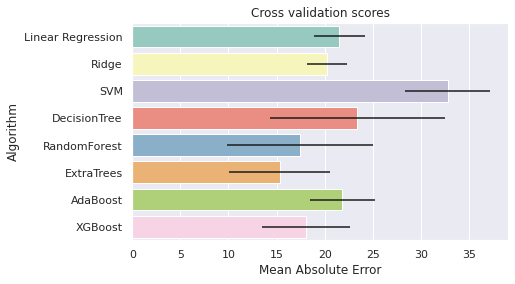

In [ ]:
random_state = 42
models = []
models.append(LinearRegression(n_jobs=-1))
models.append(Ridge(random_state =random_state))
models.append(SVR())
models.append(DecisionTreeRegressor(random_state=random_state))
models.append(RandomForestRegressor(n_jobs=-1, random_state=random_state))
models.append(ExtraTreesRegressor(n_jobs=-1,random_state=random_state))
models.append(AdaBoostRegressor(random_state=random_state))
models.append(XGBRegressor(random_state=random_state))

cv_results = []
for model in models:
    cv_results.append(cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error',
                                      cv = tscv, n_jobs=-1)) #MAE를 평가지표로 사용

cv_means = []    
cv_std = []
for cv_result in cv_results:
    cv_means.append(-1*cv_result.mean()) # 해석하기 쉽도록 음수값을 양수로 변환
    cv_std.append(-1*cv_result.std()) #해석하기 쉽도록 음수값을 양수로 변환    

cv_res = pd.DataFrame({'CrossValMeans': cv_means, 'CrossValerrors': cv_std, 
                       'Algorithm':['Linear Regression', 'Ridge', 'SVM', 'DecisionTree', 'RandomForest', 'ExtraTrees',
                                            'AdaBoost', 'XGBoost']}) 
g = sns.barplot('CrossValMeans', 'Algorithm', data = cv_res, palette='Set3', orient='h',
                **{'xerr':cv_std})   
g.set_xlabel('Mean Absolute Error')
g = g.set_title('Cross validation scores')

> MAE가 제일 낮은 `ExtraTree 모델`을 최종적으로 선택하여 HyperParameter Tuning을 진행함

In [ ]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,21.533689,-2.681172,Linear Regression
1,20.263693,-2.106433,Ridge
2,32.784386,-4.438350,SVM
3,23.400318,-9.120443,DecisionTree
4,17.482503,-7.589538,RandomForest
5,15.311785,-5.242515,ExtraTrees
6,21.848323,-3.338334,AdaBoost
7,18.033864,-4.550830,XGBoost


# HyperParameter Tuning

- Grid Search 방법을 이용하여 모델을 최적화

In [ ]:
ExtR = ExtraTreesRegressor(n_jobs = -1, random_state = random_state)

ex_param_grid = {'max_features': [None],
                                'min_samples_split': [2, 4],
                                'min_samples_leaf': [2, 4],
                                'n_estimators': [300, 500]}

gsExtC = GridSearchCV(ExtR, param_grid = ex_param_grid, cv = tscv, 
                      scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)

gsExtC.fit(X, y)
ExtC_best = gsExtC.best_estimator_
print('Best Score :', gsExtC.best_score_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Score : -15.215216686564869


In [ ]:
gsExtC.best_params_

{'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 500}

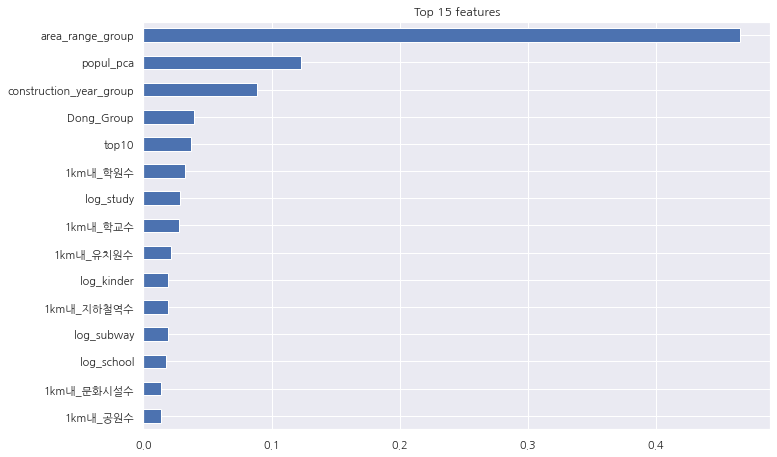

In [ ]:
# 특성 중요도 확인
importances = pd.Series(ExtC_best.feature_importances_, X.columns)

n = 15
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [ ]:
import joblib
joblib.dump(ExtC_best, '/content/gdrive/MyDrive/CodeStates/CP1/Best_ExtraTrees.pkl')

['/content/gdrive/MyDrive/CodeStates/CP1/Best_ExtraTrees.pkl']